Load all packages you need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [2]:
df = pd.read_csv("../data/df_imputed_clean.csv")

Create a scatterplot for the variables "Age" and "Pregnancies".

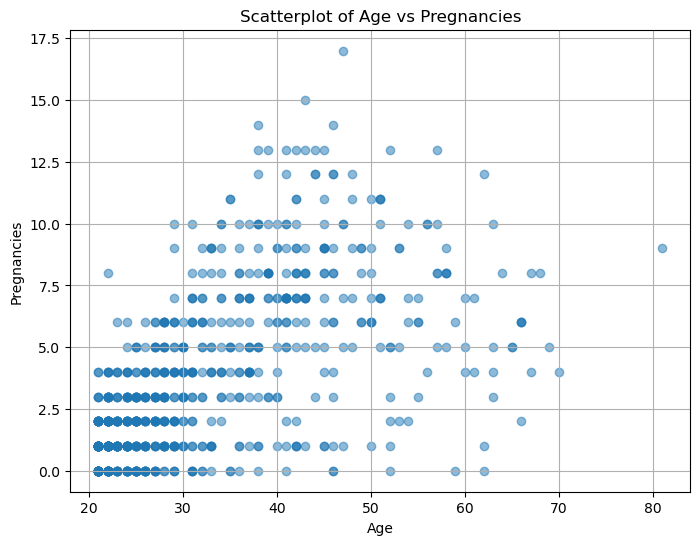

In [3]:
# Assuming 'df' is your DataFrame and it contains the columns 'BMI' and 'BloodPressure'
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Pregnancies'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatterplot of Age vs Pregnancies')
plt.grid(True)
plt.show()

Let's see if we can find any useful clusters in this data. <br>
Clustering algorithms are affected by variance heterogenity between the variables (variables with smaller variance have larger influence).<br>
Inspect the histograms of both variables and apply an appropriate normalization method.<br> 

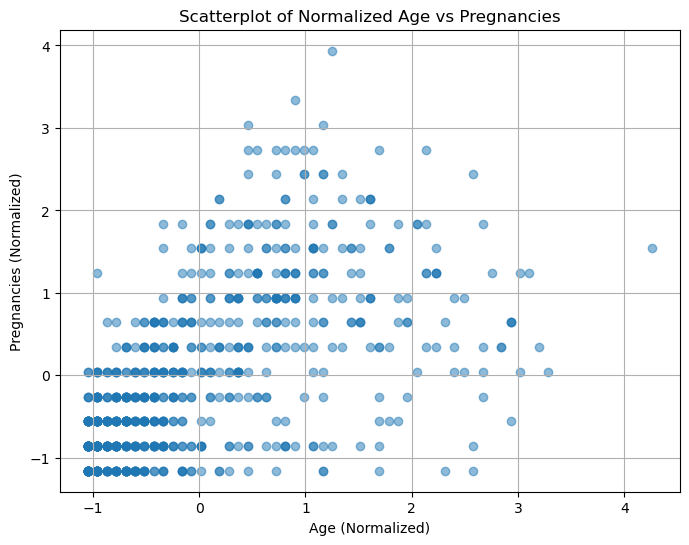

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize the data if necessary
scaler = StandardScaler()

# Normalize the Age and Pregnancies columns
df['Age_norm'] = scaler.fit_transform(df[['Age']])
df['Pregnancies_norm'] = scaler.fit_transform(df[['Pregnancies']])

# Display the first few rows of the normalized columns
df[['Age_norm', 'Pregnancies_norm']].head()
# Scatterplot for normalized Age and Pregnancies
plt.figure(figsize=(8, 6))
plt.scatter(df['Age_norm'], df['Pregnancies_norm'], alpha=0.5)
plt.xlabel('Age (Normalized)')
plt.ylabel('Pregnancies (Normalized)')
plt.title('Scatterplot of Normalized Age vs Pregnancies')
plt.grid(True)
plt.show()




Perform the K-Means clustering algorithm with k = [2,3,4,5] clusters. Use the elbow method to determine the optimal number of clusters.

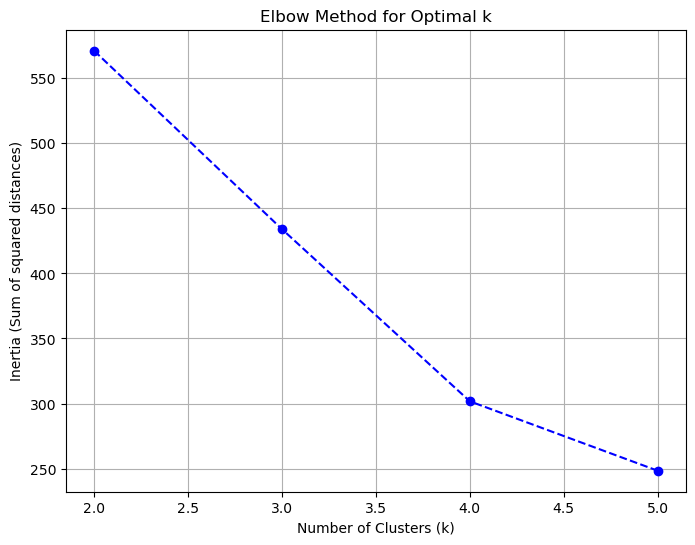

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the normalized data
X = df[['Age_norm', 'Pregnancies_norm']]

# List to store inertia values for different k
inertia = []

# Run K-Means for different values of k (2, 3, 4, 5)
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()


Plot the optimal number of clusters on your scatterplot.

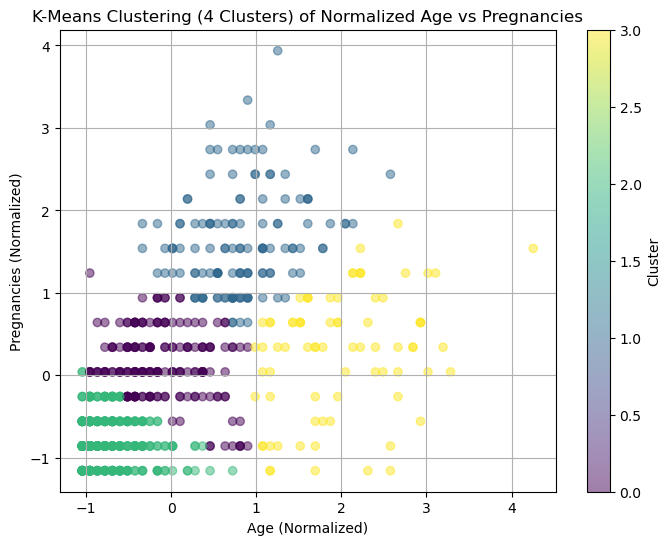

In [7]:
# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatterplot with the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Age_norm'], df['Pregnancies_norm'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Age (Normalized)')
plt.ylabel('Pregnancies (Normalized)')
plt.title('K-Means Clustering (4 Clusters) of Normalized Age vs Pregnancies')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
